In [1]:
from tensorflow.keras.preprocessing.text import one_hot #this is used for one hot encoding

d:\DS and ML BOOTCAMP\PYTHON\52. Deep Learning\ANN Bank classification\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
### sentences
sent=[  'the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words',
     'your videos are good',]

In [3]:
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good']

In [4]:
## Define the vocabulary size
voc_size=10000 #here we are assuming we have 10000 words in our vocabulary

In [7]:
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good']

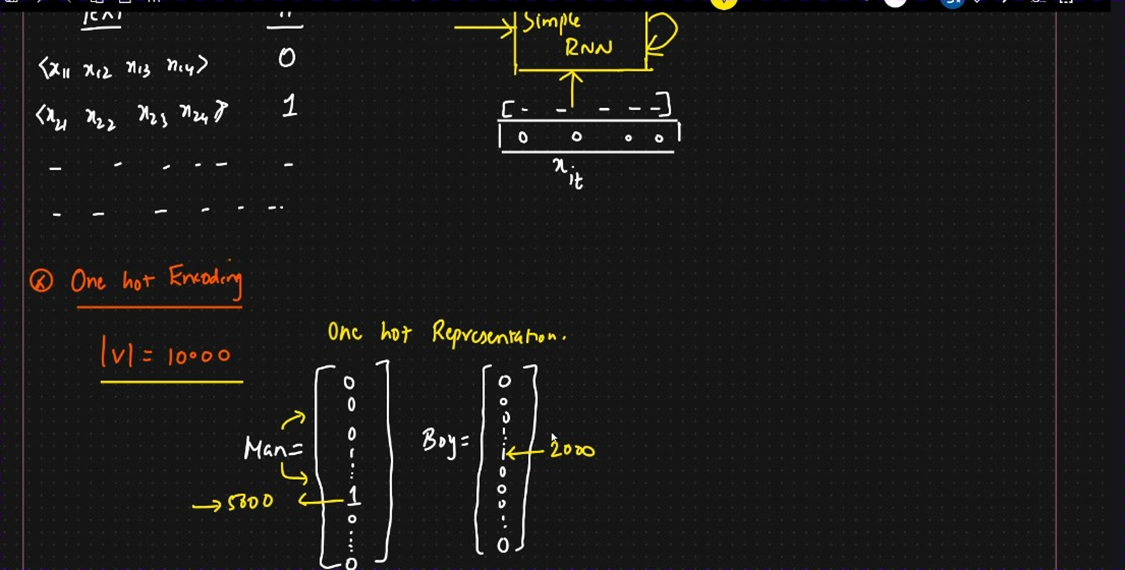

Let´s introduce One Hot Representation. (At this case, we have create a vocabulary size of 1000, now each word will have a representation number between 1 and 1000)

In [5]:
### One Hot Representation
one_hot_repr=[one_hot(words,voc_size)for words in sent]
one_hot_repr

[[9115, 1391, 3623, 9089],
 [9115, 1391, 3623, 3763],
 [9115, 6307, 3623, 414],
 [1765, 6501, 8247, 8885, 4235],
 [1765, 6501, 8247, 8885, 3650],
 [1051, 9115, 6817, 3623, 4299],
 [7559, 3375, 2239, 8885]]

In [6]:
## word Embedding Representation
 
from tensorflow.keras.layers import Embedding #importing embedding layer for incrusting word vectors
#from tensorflow.keras.processing.sequence import pad_sequences
from tensorflow.keras.utils import pad_sequences #importing pad_sequences to make the length of all sequences equal
from tensorflow.keras.models import Sequential #importing sequential model cause RNN works on sequential model

In [7]:
import numpy as np

In [9]:
sent

['the glass of milk',
 'the glass of juice',
 'the cup of tea',
 'I am a good boy',
 'I am a good developer',
 'understand the meaning of words',
 'your videos are good']

In [10]:
sent_length=8 #defining the maximum length of sentence is 8 for the group of senetences we have
embedded_docs=pad_sequences(one_hot_repr,padding='post',maxlen=sent_length) #creating padded sequences (matrix) for one hot representation
print(embedded_docs)

[[9115 1391 3623 9089    0    0    0    0]
 [9115 1391 3623 3763    0    0    0    0]
 [9115 6307 3623  414    0    0    0    0]
 [1765 6501 8247 8885 4235    0    0    0]
 [1765 6501 8247 8885 3650    0    0    0]
 [1051 9115 6817 3623 4299    0    0    0]
 [7559 3375 2239 8885    0    0    0    0]]


In [11]:
## feature representation
dim=10 #defining dimension of word vector

In [12]:
model=Sequential() #initializing sequential model
model.add(Embedding(voc_size,dim,input_length=sent_length)) #adding embedding layer to the model, 
#here voc_size is the size of vocabulary= 1000, dim=10 is the dimension of word vector and input_length is the length of input sequence
model.compile('adam','mse') #optimizer=adam and loss function = mse, optimizer is used to update weights and mse is used to calculate error

d:\DS and ML BOOTCAMP\PYTHON\52. Deep Learning\ANN Bank classification\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.predict(embedded_docs) #predicting the word vectors for each word in the embedded_docS, dim =10 means each word is represented by 10 features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


array([[[-0.01654532,  0.0164294 ,  0.02696126,  0.02741686,
         -0.04267034, -0.02600865, -0.00189345,  0.04858768,
          0.04343594,  0.00423393],
        [ 0.04574653,  0.04916361,  0.02026084, -0.03957371,
         -0.02917085, -0.02216595, -0.02158969,  0.00291377,
          0.00462373,  0.02864529],
        [-0.02935578, -0.00847531,  0.02380339,  0.04233216,
         -0.04991437, -0.04641198, -0.04575869,  0.03774846,
         -0.01830206, -0.02474144],
        [ 0.01732323, -0.04513901, -0.00181182,  0.00285227,
         -0.0047011 ,  0.01485528,  0.02407204, -0.00923431,
         -0.0176411 , -0.01243277],
        [-0.01207831, -0.02016026, -0.03162517, -0.02479104,
          0.03766562, -0.02688892,  0.02663345, -0.00961132,
         -0.00096741, -0.04153783],
        [-0.01207831, -0.02016026, -0.03162517, -0.02479104,
          0.03766562, -0.02688892,  0.02663345, -0.00961132,
         -0.00096741, -0.04153783],
        [-0.01207831, -0.02016026, -0.03162517, -0.0

### example with the first sentences

In [ ]:
embedded_docs[0]

array([9115, 1391, 3623, 9089,    0,    0,    0,    0])

In [ ]:
model.predict(np.expand_dims(embedded_docs[0], axis=0)) #predicting word vectors for first sentence only
#np.expand_dims is used to add an extra dimension to the input array, axis=0 means adding dimension at the beginning


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[[-0.01654532,  0.0164294 ,  0.02696126,  0.02741686,
         -0.04267034, -0.02600865, -0.00189345,  0.04858768,
          0.04343594,  0.00423393],
        [ 0.04574653,  0.04916361,  0.02026084, -0.03957371,
         -0.02917085, -0.02216595, -0.02158969,  0.00291377,
          0.00462373,  0.02864529],
        [-0.02935578, -0.00847531,  0.02380339,  0.04233216,
         -0.04991437, -0.04641198, -0.04575869,  0.03774846,
         -0.01830206, -0.02474144],
        [ 0.01732323, -0.04513901, -0.00181182,  0.00285227,
         -0.0047011 ,  0.01485528,  0.02407204, -0.00923431,
         -0.0176411 , -0.01243277],
        [-0.01207831, -0.02016026, -0.03162517, -0.02479104,
          0.03766562, -0.02688892,  0.02663345, -0.00961132,
         -0.00096741, -0.04153783],
        [-0.01207831, -0.02016026, -0.03162517, -0.02479104,
          0.03766562, -0.02688892,  0.02663345, -0.00961132,
         -0.00096741, -0.04153783],
        [-0.01207831, -0.02016026, -0.03162517, -0.0